Hey!

In [64]:
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import scanpy as sc
import sklearn.decomposition #import TruncatedSVD
import scipy 
import sparse, io
import os 
matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'

os.chdir('/lunarc/nobackup/projects/regen_immuno/tools/samap/transcriptomes/')
hs_adata=anndata.read_h5ad('/lunarc/nobackup/projects/regen_immuno/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/local.h5ad')

In [5]:
# Set a random seed for reproducibility
np.random.seed(42)

# Identify the unique clusters in the 'free_annotation' column
unique_clusters = hs_adata.obs['free_annotation'].unique()

# Create a DataFrame to store the selected cell indices
selected_indices = []

# Determine the number of cells to select from each cluster
total_cells_to_keep = int(0.3 * len(hs_adata.obs))
cluster_sizes = hs_adata.obs['free_annotation'].value_counts()

# Loop through each cluster and select proportionate cells
for cluster in unique_clusters:
    cluster_indices = hs_adata.obs[hs_adata.obs['free_annotation'] == cluster].index
    n_cells_to_keep = int(cluster_sizes[cluster] / len(hs_adata.obs) * total_cells_to_keep)
    selected_indices.extend(np.random.choice(cluster_indices, n_cells_to_keep, replace=False))

# Create a new AnnData object containing only the selected cells
hs_adata_selected = hs_adata[selected_indices].copy()

# Print information about the selected cells
print("Original number of cells:{}".format(hs_adata.n_obs))
print("Number of selected cells:{}".format(hs_adata_selected.n_obs))

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Original number of cells:264824
Number of selected cells:79373


The cell selection method provided involves selecting an equal number of cells from each cluster in a single-cell dataset, ensuring balanced representation and preventing dominance by larger clusters during downstream analysis.

In [6]:
hs_adata.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,HsapDv:0000161,HANCESTRO:0005,monocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,...,HsapDv:0000161,HANCESTRO:0005,liver dendritic cell,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACGTTTCTTAC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,9387.0,2345,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,37347.0,395,macrophage,macrophage,True,immune,...,HsapDv:0000155,HANCESTRO:0016,macrophage,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P6_S366,Vasculature,EFO:0008931,TSP2,aorta,111047.0,769,macrophage,macrophage,True,immune,...,HsapDv:0000155,HANCESTRO:0016,macrophage,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,140634.0,2468,macrophage,macrophage,True,immune,...,HsapDv:0000155,HANCESTRO:0016,macrophage,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,176268.0,2700,macrophage,macrophage,True,immune,...,HsapDv:0000155,HANCESTRO:0016,macrophage,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage


In [7]:
import pandas as pd

dataset=pd.read_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/gene&prot.csv")
hs_conversion =dataset.dropna()
print(hs_conversion.head(10))

     Gene stable ID Protein stable ID version
5   ENSG00000198888         ENSP00000354687.2
9   ENSG00000198763         ENSP00000355046.4
15  ENSG00000198804         ENSP00000354499.2
18  ENSG00000198712         ENSP00000354876.1
20  ENSG00000228253         ENSP00000355265.1
21  ENSG00000198899         ENSP00000354632.2
22  ENSG00000198938         ENSP00000354982.2
24  ENSG00000198840         ENSP00000355206.2
26  ENSG00000212907         ENSP00000354728.1
27  ENSG00000198886         ENSP00000354961.2


In [8]:
hs_res = ('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/Tabula_immune.h5ad')
hs_adata_selected.write(hs_res)
# Display variable (gene) names from the selected AnnData object
print("Gene names:")
print(hs_adata_selected.var_names)

Gene names:
Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)


In [9]:
#Dont have access for some reason
#!wget -O samap_intermediate/hs_to_pw.txt https://lu.box.com/shared/static/fpb5tk1ba1dzs7re1pthlh846bq0ay80.txt
#!wget -O samap_intermediate/pw_to_hs.txt https://lu.box.com/shared/static/sytvvnhkj31tjixn1oidfvttxvjeq1f7.txt

In [10]:
#Importing the reciprocal Blast results
#Humans to pw
hs_pw= pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/hs_to_pw.txt")
hs_pw_header = ['ensp', 'pw_pep', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
hs_pw.columns =hs_pw_header
#pw to Humans
pw_hs =pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/pw_to_hs.txt")
pw_hs_header = ['pw_pep', 'ensp', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
pw_hs.columns =pw_hs_header

#Creating a mapping dict
mapping_dict = hs_conversion.set_index('Protein stable ID version')['Gene stable ID'].to_dict()

#Mapping the columns of the blast results to the gene ids
hs_pw['ensp'] = hs_pw['ensp'].map(mapping_dict).fillna(hs_pw['ensp'])
pw_hs['ensp'] =pw_hs['ensp'].map(mapping_dict).fillna(hs_pw['ensp'])

In [11]:
import scanpy as sc
spleen_data=sc.read_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/spleenR1.h5ad')
spleen_genes = spleen_data.var_names
spleen_genes=pd.DataFrame(spleen_genes)
spleen_genes.columns = ['Gene_Names']
print(spleen_genes)
print("Number of cells in spleen data:",spleen_data.n_obs)

      Gene_Names
0           POL3
1      gene26597
2      gene26598
3           SPX2
4      gene26599
...          ...
65592     NU5M.1
65593     COX1.1
65594     COX1.2
65595       NU2M
65596  gene65597

[65597 rows x 1 columns]
Number of cells in spleen data: 19045


In [12]:
header=['gene_id','gene_name','Gene_expr']
spleen_id_name = pd.read_table('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/features.tsv',names=header)
spleen_id_name          

,gene_id,gene_name,Gene_expr
0,gene26596,POL3,Gene Expression
1,gene26597,gene26597,Gene Expression
2,gene26598,gene26598,Gene Expression
3,gene26595,SPX2,Gene Expression
4,gene26599,gene26599,Gene Expression
...,...,...,...
65592,gene65593,NU5M,Gene Expression
65593,gene65594,COX1,Gene Expression
65594,gene65595,COX1,Gene Expression
65595,gene65596,NU2M,Gene Expression


In [13]:
annot_mapping=pd.read_table('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/annot_mapping.csv')
annot_mapping

,gene_id,transcript_id,sprot_Top_BLASTX_hit,prot_id,EggNM.Preferred_name
0,gene65541,mRNA174710,.,mRNA174710.pep,.
1,gene65590,mRNA174774,.,mRNA174774.pep,.
2,gene65569,mRNA174746,"TSN31_DANRE^TSN31_DANRE^Q:142-588,H:1-149^73.1...",mRNA174746.pep,TSPAN31
3,gene65568,mRNA174743,"YG31B_YEAST^YG31B_YEAST^Q:1973-3145,H:638-1008...",mRNA174743.pep,.
4,gene65568,mRNA174744,"YG31B_YEAST^YG31B_YEAST^Q:1973-3145,H:638-1008...",mRNA174744.pep,.
...,...,...,...,...,...
174777,gene65485,mRNA174600,"E41L3_MOUSE^E41L3_MOUSE^Q:93-1838,H:1-620^75.8...",mRNA174600.pep,EPB41L3
174778,gene65485,mRNA174599,"E41L3_MOUSE^E41L3_MOUSE^Q:93-1841,H:1-620^75.7...",mRNA174599.pep,EPB41L3
174779,gene65485,mRNA174598,"E41L3_MOUSE^E41L3_MOUSE^Q:229-1962,H:6-620^75....",mRNA174598.pep,EPB41L3
174780,gene65485,mRNA174602,"E41L3_MOUSE^E41L3_MOUSE^Q:93-1931,H:1-620^80.7...",mRNA174602.pep,EPB41L3


In [14]:
mapping_dict_anno =annot_mapping.set_index('prot_id')['gene_id'].to_dict()
hs_pw['pw_pep'] = hs_pw['pw_pep'].map(mapping_dict_anno).fillna(hs_pw['pw_pep'])
hs_pw

,ensp,pw_pep,3,4,5,6,7,8,9,10,11,12
0,ENSG00000211821,gene46259,38.554,83,51,0,30,112,94,176,1.390000e-15,72.4
1,ENSG00000211821,gene46259,38.554,83,51,0,30,112,94,176,1.470000e-15,72.4
2,ENSG00000211821,gene46255,36.522,115,64,3,8,115,61,173,1.600000e-15,70.9
3,ENSG00000211821,gene46255,36.522,115,64,3,8,115,61,173,5.580000e-15,70.5
4,ENSG00000211821,gene7213,30.172,116,75,3,1,111,39,153,2.360000e-09,53.5
...,...,...,...,...,...,...,...,...,...,...,...,...
5630582,ENSG00000116786,gene47382,68.880,1009,264,5,1,978,1,990,0.000000e+00,1398.0
5630583,ENSG00000116786,gene47382,68.880,1009,263,6,1,978,1,989,0.000000e+00,1392.0
5630584,ENSG00000116786,gene47382,67.393,1009,259,6,1,978,1,970,0.000000e+00,1354.0
5630585,ENSG00000116786,gene44928,28.177,181,107,3,1,161,11,188,7.700000e-13,74.7


In [15]:
pw_hs['pw_pep']=pw_hs['pw_pep'].map(mapping_dict_anno).fillna(pw_hs['pw_pep'])
pw_hs

,pw_pep,ensp,3,4,5,6,7,8,9,10,11,12
0,gene65569,ENSG00000135452,79.808,104,21,0,1,104,1,104,2.030000e-53,166.0
1,gene65569,ENSG00000135452,79.808,104,21,0,1,104,1,104,3.360000e-53,166.0
2,gene65569,ENSG00000106537,59.286,140,55,2,1,139,1,139,4.180000e-42,140.0
3,gene65569,ENSG00000135452,86.154,65,9,0,1,65,1,65,2.080000e-30,107.0
4,gene65569,ENSG00000135452,51.389,72,32,1,79,150,1,69,4.920000e-19,77.4
...,...,...,...,...,...,...,...,...,...,...,...,...
5239034,gene65485,ENSG00000139926,21.687,249,161,8,140,354,41,289,4.210000e-07,55.1
5239035,gene65485,ENSG00000153303,22.553,235,157,7,137,347,8,241,4.310000e-07,55.1
5239036,gene65485,ENSG00000007944,31.915,94,61,2,301,393,4,95,5.820000e-07,53.5
5239037,gene65485,ENSG00000171914,25.170,147,106,2,168,310,174,320,9.790000e-07,54.7


In [16]:
spleen_genes_ids=spleen_id_name['gene_id']
spleen_genes_ids

0        gene26596
1        gene26597
2        gene26598
3        gene26595
4        gene26599
           ...    
65592    gene65593
65593    gene65594
65594    gene65595
65595    gene65596
65596    gene65597
Name: gene_id, Length: 65597, dtype: object

Starting the process from the SAMap vignett

In [2]:
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles,
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM

In [ ]:
#org1 ='/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Pw_spleenR1.h5ad'
org1='/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl.h5ad'
org2 ='/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Tabula_immune.h5ad'
filenames = {'pw':org1,'hs':org2}

sm = SAMAP(
        filenames,
        f_maps = 'maps/',
        save_processed=True, #if False, do not save the processed results to `*_pr.h5ad`
        keys = {'pw':'seurat_clusters','hs':'free_annotation'},
   )

Processing data pw from:
/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl.h5ad


In [ ]:
sm.run()
samap = sm.samap

In [47]:
#from samap.utils import save_samap
#save_samap(sm, '/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/pw_hs_spl_SAM.pkl')

#To load in SAMAP directly
import pickle
with open('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/pw_hs_spl_SAM.pkl', 'rb') as f:
    sm = pickle.load(f)
samap =sm.samap

In [ ]:
samap.adata

In [ ]:
samap.adata.obs

In [84]:
keys = {'pw':'seurat_clusters','hs':'tissue'}
D,MappingTable = get_mapping_scores(sm,keys,n_top = 0)
D.head()
MappingTable.head()
samap.adata.obs

,pw_orig.ident,pw_soup_assign,pw_soup_status,pw_scds_DropletType,pw_combined_status,pw_RNA_snn_res.0.8,pw_seurat_clusters,pw_ident,hs_tissue_in_publication,hs_assay_ontology_term_id,...,hs_assay,hs_disease,hs_organism,hs_sex,hs_tissue,hs_self_reported_ethnicity,hs_development_stage,batch,species,seurat_clusters;tissue_mapping_scores
AAACCCAAGACGCTCC-1,Round1_spl,0,singlet,singlet,0_singlet,1,1,1,unassigned,unassigned,...,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,batch1,pw,pw_1
AAACCCAAGATCCTAC-1,Round1_spl,1,singlet,singlet,1_singlet,16,16,16,unassigned,unassigned,...,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,batch1,pw,pw_16
AAACCCAAGCCGCACT-1,Round1_spl,0,singlet,singlet,0_singlet,0,0,0,unassigned,unassigned,...,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,batch1,pw,pw_0
AAACCCAAGCTTTCTT-1,Round1_spl,0,singlet,singlet,0_singlet,0,0,0,unassigned,unassigned,...,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,batch1,pw,pw_0
AAACCCAAGGCATCTT-1,Round1_spl,0,singlet,singlet,0_singlet,0,0,0,unassigned,unassigned,...,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,batch1,pw,pw_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACTTGTTAGCTGCAAG_TSP2_Thymus_NA_10X_1_3_5prime,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,Thymus,EFO:0030004,...,10x 5' transcription profiling,normal,Homo sapiens,female,thymus,African American or Afro-Caribbean,61-year-old human stage,batch2,hs,hs_thymus
ACTGCTCCAGACTCGC_TSP2_Thymus_NA_10X_1_4_5prime,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,Thymus,EFO:0030004,...,10x 5' transcription profiling,normal,Homo sapiens,female,thymus,African American or Afro-Caribbean,61-year-old human stage,batch2,hs,hs_thymus
CTCGGGATCTTCGGTC_TSP2_Thymus_NA_10X_1_4_5prime,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,Thymus,EFO:0030004,...,10x 5' transcription profiling,normal,Homo sapiens,female,thymus,African American or Afro-Caribbean,61-year-old human stage,batch2,hs,hs_thymus
CCAGCGACATGACGGA_TSP2_Thymus_NA_10X_1_3_5prime,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,Thymus,EFO:0030004,...,10x 5' transcription profiling,normal,Homo sapiens,female,thymus,African American or Afro-Caribbean,61-year-old human stage,batch2,hs,hs_thymus


Plotting the Mapped clusters

In [86]:
import holoviews


chord_plot(MappingTable, align_thr=0.3)

ImportError: Please install holoviews-samap with `!pip install holoviews-samap`.

In [ ]:
samap.scatter(c='hs_tissue')


In [62]:
#Using cell type annotation instead of tissue.
keys_ct = {'pw':'seurat_clusters','hs':'cell_type'}
Ct,MappingTable_ct = get_mapping_scores(sm,keys_ct,n_top = 100)
Ct.head()
Ct.to_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Output_ct_map_pw&hs.csv")
MappingTable_ct.head()
MappingTable_ct.to_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Mappingtable_ct_pw&hs.csv")
Ct.head()

pw_0                 hs_plasma cell                  \
                 Cluster Alignment score        Cluster Alignment score   
0         hs_plasma cell        0.914628           pw_0        0.914628   
1              hs_B cell        0.896409           pw_2        0.764478   
2  hs_classical monocyte        0.880588           pw_1        0.725322   
3          hs_macrophage        0.875854           pw_4        0.279542   
4          hs_neutrophil        0.861119           pw_5        0.143372   

  hs_B cell                 hs_classical monocyte                  \
    Cluster Alignment score               Cluster Alignment score   
0      pw_0        0.896409                  pw_0        0.880588   
1      pw_2         0.53303                 pw_16        0.826839   
2      pw_1        0.505502                  pw_1        0.260069   
3      pw_4        0.064512                  pw_7        0.047362   
4      pw_5        0.063763                  pw_2        0.036958   

  hs_macrophage                  ...  \
        Cluster Alignment score  ...   
0          pw_0        0.875854  ...   
1          pw_6        0.786787  ...   
2          pw_1        0.320123  ...   
3          pw_2        0.232431  ...   
4         pw_10        0.142784  ...   

                                                pw_9                  \
                                             Cluster Alignment score   
0          hs_CD4-positive, alpha-beta memory T cell        0.001944   
1                 hs_CD4-positive, alpha-beta T cell        0.001465   
2  hs_naive thymus-derived CD4-positive, alpha-be...        0.001198   
3          hs_CD8-positive, alpha-beta memory T cell        0.000687   
4                                               pw_0             0.0   

  hs_double-positive, alpha-beta thymocyte                  \
                                   Cluster Alignment score   
0                                     pw_0             0.0   
1               hs_hematopoietic stem cell             0.0   
2                             hs_mast cell             0.0   
3                            hs_macrophage             0.0   
4                  hs_liver dendritic cell             0.0   

                        pw_19                              hs_plasmablast  \
                      Cluster Alignment score                     Cluster   
0                        pw_0             0.0                        pw_0   
1  hs_hematopoietic stem cell             0.0  hs_hematopoietic stem cell   
2                hs_mast cell             0.0                hs_mast cell   
3               hs_macrophage             0.0               hs_macrophage   
4     hs_liver dendritic cell             0.0     hs_liver dendritic cell   

                    hs_erythroid lineage cell                  
  Alignment score                     Cluster Alignment score  
0             0.0                        pw_0             0.0  
1             0.0  hs_hematopoietic stem cell             0.0  
2             0.0                hs_mast cell             0.0  
3             0.0               hs_macrophage             0.0  
4             0.0     hs_liver dendritic cell             0.0  

[5 rows x 152 columns]

In [63]:
Ct.to_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Output_ct_map_pw&hs.csv")
Ct


pw_0                  \
                                     Cluster Alignment score   
0                             hs_plasma cell        0.914628   
1                                  hs_B cell        0.896409   
2                      hs_classical monocyte        0.880588   
3                              hs_macrophage        0.875854   
4                              hs_neutrophil        0.861119   
..                                       ...             ...   
71                                      pw_1             0.0   
72  hs_double-positive, alpha-beta thymocyte             0.0   
73                                      pw_2             0.0   
74                 hs_erythroid lineage cell             0.0   
75                                      pw_0             0.0   

                                 hs_plasma cell                  \
                                        Cluster Alignment score   
0                                          pw_0        0.914628   
1                                          pw_2        0.764478   
2                                          pw_1        0.725322   
3                                          pw_4        0.279542   
4                                          pw_5        0.143372   
..                                          ...             ...   
71                            hs_dendritic cell             0.0   
72     hs_double-positive, alpha-beta thymocyte             0.0   
73  hs_effector CD4-positive, alpha-beta T cell             0.0   
74  hs_effector CD8-positive, alpha-beta T cell             0.0   
75                          hs_type I NK T cell             0.0   

                                      hs_B cell                  \
                                        Cluster Alignment score   
0                                          pw_0        0.896409   
1                                          pw_2         0.53303   
2                                          pw_1        0.505502   
3                                          pw_4        0.064512   
4                                          pw_5        0.063763   
..                                          ...             ...   
71     hs_double-positive, alpha-beta thymocyte             0.0   
72  hs_effector CD4-positive, alpha-beta T cell             0.0   
73  hs_effector CD8-positive, alpha-beta T cell             0.0   
74                               hs_erythrocyte             0.0   
75                          hs_type I NK T cell             0.0   

                          hs_classical monocyte                  \
                                        Cluster Alignment score   
0                                          pw_0        0.880588   
1                                         pw_16        0.826839   
2                                          pw_1        0.260069   
3                                          pw_7        0.047362   
4                                          pw_2        0.036958   
..                                          ...             ...   
71     hs_double-positive, alpha-beta thymocyte             0.0   
72  hs_effector CD4-positive, alpha-beta T cell             0.0   
73  hs_effector CD8-positive, alpha-beta T cell             0.0   
74                               hs_erythrocyte             0.0   
75                          hs_type I NK T cell             0.0   

                                  hs_macrophage                  ...  \
                                        Cluster Alignment score  ...   
0                                          pw_0        0.875854  ...   
1                                          pw_6        0.786787  ...   
2                                          pw_1        0.320123  ...   
3                                          pw_2        0.232431  ...   
4                                         pw_10        0.142784  ...   
..                                          ...             ...  ...   
71     hs_doubl

In [31]:
Gp,G1,G2,pvals1,pvals2=gpf_ct.find_genes('hs_macrophage','pw_5')

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [33]:
print(Gp)
print(G1)
print(G2)

['hs_ENSG00000159189;pw_gene47418' 'hs_ENSG00000173369;pw_gene47418'
 'hs_ENSG00000173372;pw_gene47418' 'hs_ENSG00000159189;pw_gene47742'
 'hs_ENSG00000173369;pw_gene47742' 'hs_ENSG00000173372;pw_gene47742'
 'hs_ENSG00000159189;pw_gene47419' 'hs_ENSG00000173369;pw_gene47419'
 'hs_ENSG00000173372;pw_gene47419' 'hs_ENSG00000038945;pw_gene55089'
 'hs_ENSG00000019169;pw_gene55089' 'hs_ENSG00000182578;pw_gene53742'
 'hs_ENSG00000177575;pw_gene55089' 'hs_ENSG00000038945;pw_gene55193'
 'hs_ENSG00000019169;pw_gene55193' 'hs_ENSG00000153208;pw_gene53742'
 'hs_ENSG00000177575;pw_gene55193' 'hs_ENSG00000159189;pw_gene27274'
 'hs_ENSG00000088827;pw_gene11289' 'hs_ENSG00000260314;pw_gene3305'
 'hs_ENSG00000143322;pw_gene53742' 'hs_ENSG00000135047;pw_gene26155'
 'hs_ENSG00000164733;pw_gene26155' 'hs_ENSG00000124491;pw_gene51440'
 'hs_ENSG00000155659;pw_gene32214' 'hs_ENSG00000038945;pw_gene27274'
 'hs_ENSG00000019169;pw_gene27274' 'hs_ENSG00000101160;pw_gene26155'
 'hs_ENSG00000038945;pw_gene55087' 

In [23]:
Ct.top

KeyError: 1

In [78]:
import holoviews as hv
chord_plot(MappingTable_ct, align_thr=0.3)

ImportError: Please install holoviews-samap with `!pip install holoviews-samap`.

<Axes: >

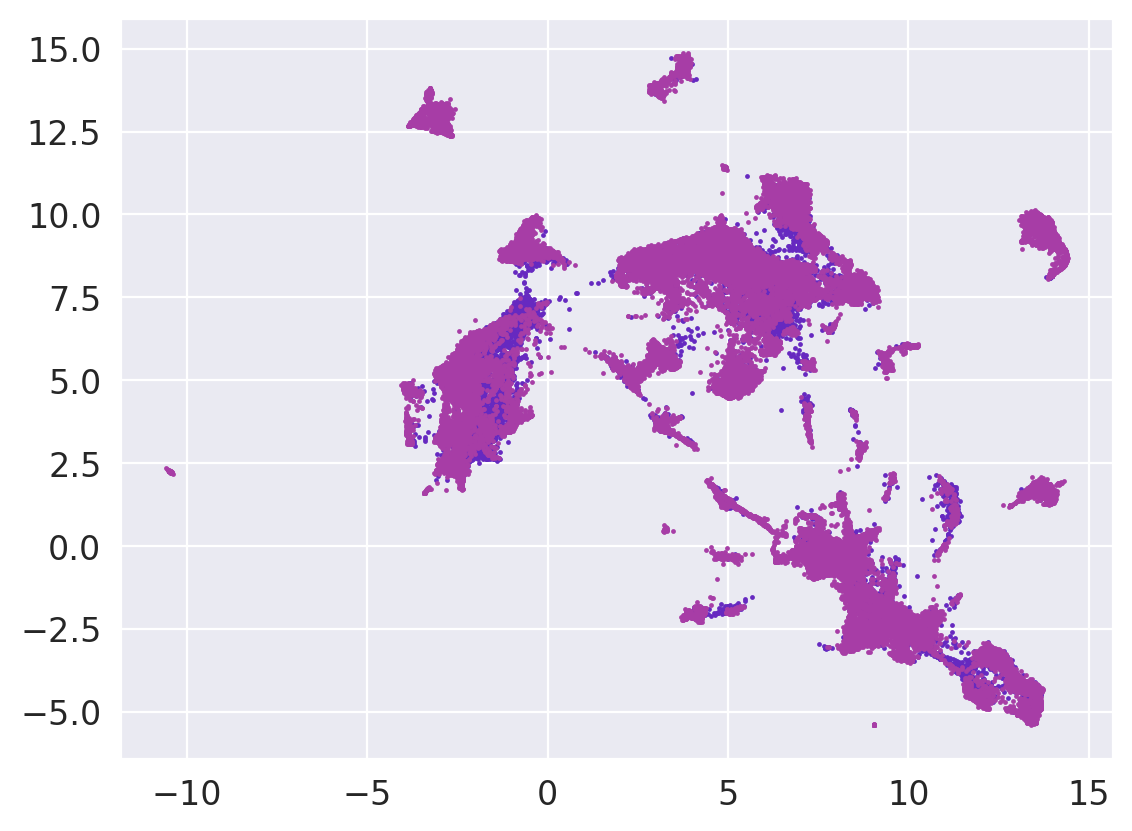

In [73]:
sm.scatter()

In [ ]:
samap.scatter(c='hs_cell_type')

In [ ]:
samap.scatter(c='pw_seurat_clusters')

In [ ]:
#Extract the cell_type column from the samap.adata.obs
cell_types=samap.adata.obs['hs_cell_type']
#Extract all the distinct cell types
cell_types_unique=cell_types.unique()
#Combine similar cell_types to one category
cell_types_hs_plot = cell_types.replace("liver dendritic cells","dendritic cells").replace("mature NK T cell","NK T cell").replace("CD8-positive, alpha-beta T cell","CD8+ T cell").replace("CD4-positive, alpha-beta T cell","CD4+ T cell").replace("double-positive, alpha-beta thymocyte","CD4+ CD8+ thymocyte").replace("CD4-positive, alpha-beta memory T cell","CD4+ mT cell").replace("CD8-positive, alpha-beta cytokine secreting effector T cell","CD8+ eT cells").replace("classical monocyte","monocyte").replace("naive B cell","B cell").replace("memory B cell","B cell").replace("type I NK T cell","NK T cell").replace("CD141-positive myeloid dendritic cell","CD141+ dendritic cell").replace("naive thymus-derived CD4-positiv, alpha-beta T cell","CD4+ T cell").replace("non-classical monocyte","monocyte").replace("effector CD8-positive, alpha-beta T cell","CD8+ eT cell").replace("effector CD4-positive, alpha-beta T cell","CD4+ eT cells").replace("regulatory T cell","Tregs").replace("CD1c-positive myeloid dendritic cell","CD1c+ DC").replace("intermediate monocyte","monocyte").replace("mature conventional dendritic cell","dendritic cell").replace("CD4-positive helper T cell","CD4+ Th cell").replace("CD8-positive, alpha-beta memory T cell","CD8+ Th cell").replace("naive thymus-derived CD8-positive, alpha-beta T cell","CD8+ T cell").replace("CD8-positive, alpha-beta cytotoxic T cell","CD8+ T cell").replace("plasmacytoid dendritic cell","pDCs").replace("naive regulatory T cell","Tregs").replace("T follicular helper cell","T cell").replace("DN4 thymocyte","thymocyte").replace("DN3 thymocyte","thymocyte").replace("DN1 thymic pro-T cell","pro-T cell").replace("naive thymus-derived CD4-positive, alpha-beta T cell","CD4+ T cell").replace("alpha-beta T cell","T cell")
cell_types_hs_plot.unique()
#Add a new column with the simplified cell types to the samap.adata.obs
samap.adata.obs['hs_cell_type_sim']=cell_types_hs_plot
#Plot the simplified cell types
samap.scatter(c='hs_cell_type_sim')

In [ ]:
print(samap.adata.obs_keys())

In [ ]:
#Doing it again with the simplified cell types
#Using cell type annotation instead of tissue.
keys_ct_sim = {'pw':'seurat_clusters','hs':'cell_type_sim'}
Ct_sim,MappingTable_ct_sim = get_mapping_scores(sm,keys_ct_sim,n_top = 0)

In [28]:
gpf_ct = GenePairFinder(sm,keys=keys_ct);
gene_pairs = gpf_ct.find_all(align_thr=0.3);

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Finding cluster-specific markers in pw:seurat_clusters.
Finding cluster-specific markers in hs:cell_type.
Calculating gene pairs for the mapping: hs;B cell to pw;1


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;CD4-positive helper T cell to pw;3


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;CD4-positive, alpha-beta T cell to pw;0


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;CD8-positive, alpha-beta T cell to pw;0


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;CD8-positive, alpha-beta memory T cell to pw;3


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;DN3 thymocyte to pw;2


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;T cell to pw;0


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;basophil to pw;11


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;effector CD4-positive, alpha-beta T cell to pw;3


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;effector CD8-positive, alpha-beta T cell to pw;3


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;erythroid progenitor cell to pw;13


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;granulocyte to pw;0


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;leukocyte to pw;0


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;macrophage to pw;11


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;macrophage to pw;5


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;mast cell to pw;11


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;memory B cell to pw;4


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;monocyte to pw;19


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;myeloid cell to pw;0


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;naive B cell to pw;1


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;neutrophil to pw;12


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;neutrophil to pw;15


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;neutrophil to pw;18


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;neutrophil to pw;9


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;non-classical monocyte to pw;5


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;plasma cell to pw;14


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;platelet to pw;6


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;thymocyte to pw;0


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Calculating gene pairs for the mapping: hs;type I NK T cell to pw;3


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [30]:
gpf

NameError: name 'gpf' is not defined

In [ ]:
#Save Gene pairs
#gene_pairs.to_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Gene_pairs_ct_pw&hs.csv")
#Read in the gene pairs
gene_pairs=pd.read_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Gene_pairs_ct_pw&hs.csv")

In [ ]:
#Drop the cells with NaN values


In [ ]:
gene_pairs

In [ ]:
#Load in the tsv file for mappings
mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()
mapper_dict

In [ ]:
#Replace the pw names with the eggnoG names
for i in gene_pairs.columns:
    if not (i.endswith('pval1') or i.endswith('pval2')):
        for j in gene_pairs[i].index:
            if pd.isna(j):
                continue
            cell_value = gene_pairs.at[j, i]
            if isinstance(cell_value, str):
                hs_pw = cell_value.split(';')
                if len(hs_pw) >= 2:
                    pw = hs_pw[1].split('_')[1]
                #Use the mapper_dict to map
                    if mapper_dict[pw] != '.':
                        hs_pw[1] = mapper_dict[pw]
                        gene_pairs.at[j, i] = ';'.join(hs_pw)


In [ ]:
gene_pairs

In [ ]:
#Save the gene pairs
#gene_pairs.to_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Tabula_Immune_Gene_pairs_ct_pw&hs_.csv")

#Load in the gene pairs
gene_pairs=pd.read_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Tabula_Immune_Gene_pairs_ct_pw&hs_.csv")

In [ ]:
#Save the gene pairs as metadata for the adata object for pw
samap.adata.obs['pw_gene_pairs']=gene_pairs


<Axes: >

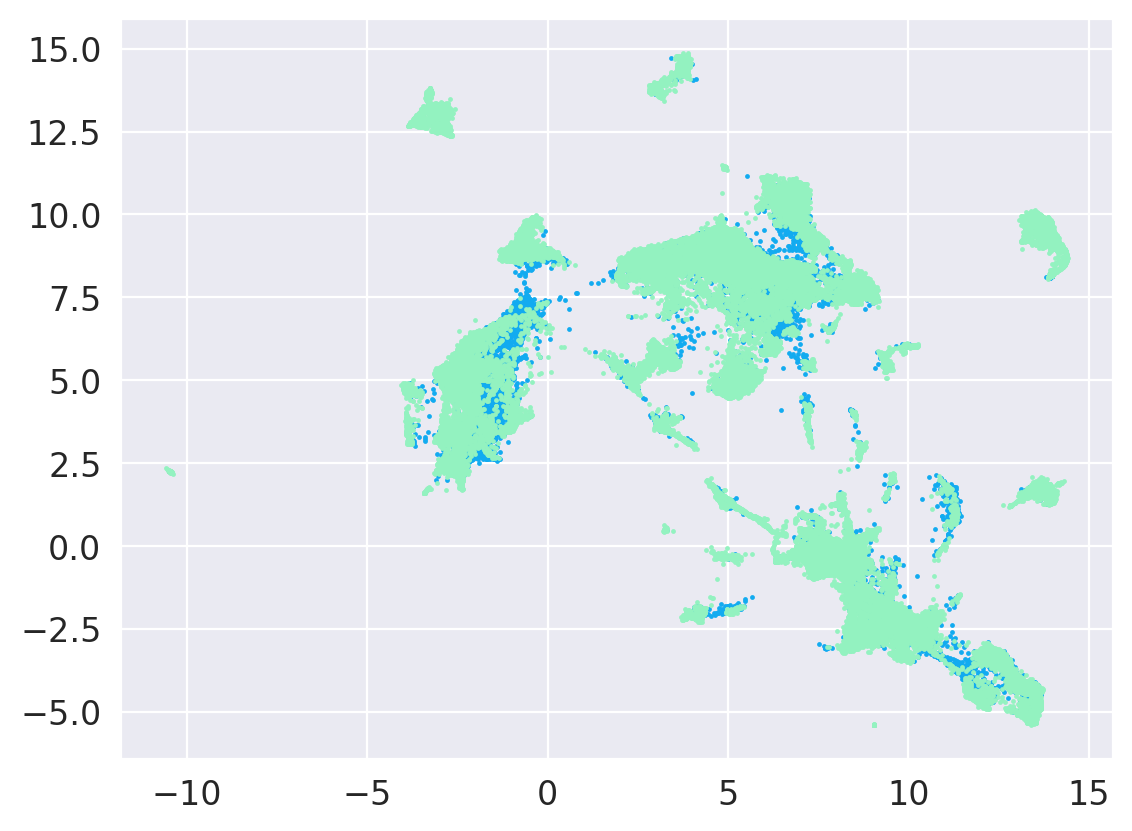

In [29]:
sm.scatter()

In [32]:
samap.adata.obs['hs_cell_type']

AAACCCAAGACGCTCC-1                                unassigned
AAACCCAAGATCCTAC-1                                unassigned
AAACCCAAGCCGCACT-1                                unassigned
AAACCCAAGCTTTCTT-1                                unassigned
AAACCCAAGGCATCTT-1                                unassigned
                                                     ...    
ACTTGTTAGCTGCAAG_TSP2_Thymus_NA_10X_1_3_5prime     thymocyte
ACTGCTCCAGACTCGC_TSP2_Thymus_NA_10X_1_4_5prime     thymocyte
CTCGGGATCTTCGGTC_TSP2_Thymus_NA_10X_1_4_5prime     thymocyte
CCAGCGACATGACGGA_TSP2_Thymus_NA_10X_1_3_5prime     thymocyte
AGGCCGTGTGGACGAT_TSP2_Thymus_NA_10X_1_3_5prime     thymocyte
Name: hs_cell_type, Length: 98432, dtype: object

In [51]:
hs_adata.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

In [34]:
hs_adata.obs["cell_type"]

AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                                 macrophage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                                   monocyte
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                                 macrophage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                       liver dendritic cell
AAAGAACGTTTCTTAC_TSP6_Liver_NA_10X_1_1                                 macrophage
                                                                     ...         
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P5_S365              macrophage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P6_S366              macrophage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P7_S367              macrophage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P8_S368              macrophage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P9_S369                  T cell
Name: cell_type, Length: 264824, dtype: category
Categories (56, object): ['hematopoietic stem cel

In [35]:
gene_pairs=gpf.find_all(n='hs_cell_Type',align_thr=0.3)

NameError: name 'gpf' is not defined

In [42]:
sm.sams['pw'].adata.obs['seurat_clusters'].head()

AAACCCAAGACGCTCC-1     1
AAACCCAAGATCCTAC-1    16
AAACCCAAGCCGCACT-1     0
AAACCCAAGCTTTCTT-1     0
AAACCCAAGGCATCTT-1     0
Name: seurat_clusters, dtype: category
Categories (21, object): ['0', '1', '2', '3', ..., '17', '18', '19', '20']

In [43]:
sm.sams['hs'].adata.obs['cell_type'].head()

AAGACAACAGGGTTGA_TSP6_Liver_NA_10X_1_1    macrophage
CATCCACCAAGGTACG_TSP6_Liver_NA_10X_1_1    macrophage
CTCAGAACACCTGTCT_TSP6_Liver_NA_10X_1_1    macrophage
GAAACCTTCACCGACG_TSP6_Liver_NA_10X_1_1    macrophage
CAGAGCCGTTGCTCGG_TSP6_Liver_NA_10X_1_1    macrophage
Name: cell_type, dtype: category
Categories (55, object): ['hematopoietic stem cell', 'erythroid progenitor cell', 'common myeloid progenitor', 'T cell', ..., 'CD141-positive myeloid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'naive regulatory T cell', 'liver dendritic cell']

In [48]:
samap.adata.obsp['connectivities']

<98432x98432 sparse matrix of type '<class 'numpy.float64'>'
	with 3703922 stored elements in Compressed Sparse Row format>

In [49]:
samap.adata.varp['homology_graph_reweighted']

<124201x124201 sparse matrix of type '<class 'numpy.float64'>'
	with 405484 stored elements in Compressed Sparse Row format>

In [60]:
for i in hs_adata.var_names:
    print(sm.query_gene_pairs(i))

{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': pw_gene13788     56.60
pw_gene37546    143.50
pw_gene50402     77.40
pw_gene50420     78.55
pw_gene60972    135.00
pw_gene4601     117.00
pw_gene5313      97.90
dtype: float64, 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'correlation': Series([], dtype: float64)}
{'blast': Series([], dtype: float64), 'co

KeyboardInterrupt: 

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/samalg/__init__.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = axes.scatter(


<Axes: >

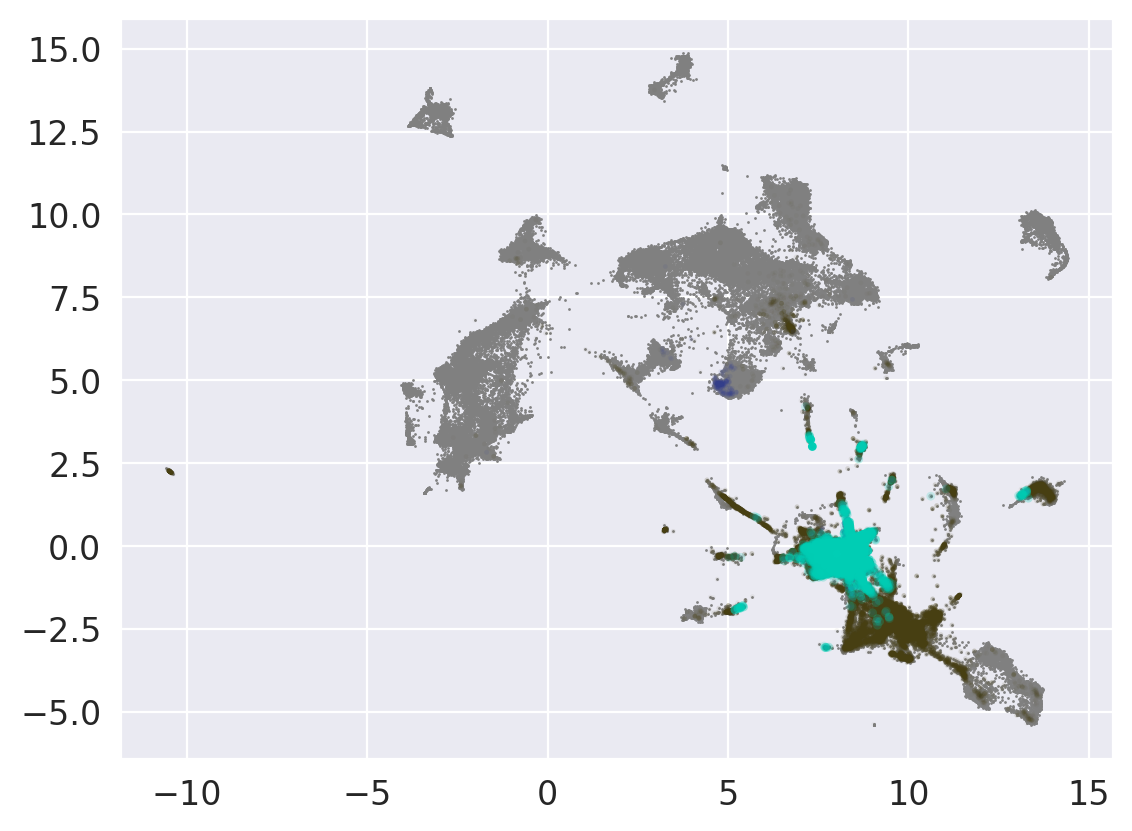

In [36]:
sm.plot_expression_overlap({'hs':'ENSG00000204103','pw':'gene51600'})

In [37]:
from samap.analysis import _KOG_TABLE

In [38]:
_KOG_TABLE

{'A': 'RNA processing and modification',
 'B': 'Chromatin structure and dynamics',
 'C': 'Energy production and conversion',
 'D': 'Cell cycle control, cell division, chromosome partitioning',
 'E': 'Amino acid transport and metabolism',
 'F': 'Nucleotide transport and metabolism',
 'G': 'Carbohydrate transport and metabolism',
 'H': 'Coenzyme transport and metabolism',
 'I': 'Lipid transport and metabolism',
 'J': 'Translation, ribosomal structure and biogenesis',
 'K': 'Transcription',
 'L': 'Replication, recombination, and repair',
 'M': 'Cell wall membrane/envelope biogenesis',
 'N': 'Cell motility',
 'O': 'Post-translational modification, protein turnover, chaperones',
 'P': 'Inorganic ion transport and metabolism',
 'Q': 'Secondary metabolites biosynthesis, transport and catabolism',
 'R': 'General function prediction only',
 'S': 'Function unknown',
 'T': 'Signal transduction mechanisms',
 'U': 'Intracellular trafficking, secretion, and vesicular transport',
 'V': 'Defense mecha